# Default Cell

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# Data Loading

In [2]:
data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Data Analysis

In [3]:
from datetime import datetime

date_format = "%Y-%m-%d %H:%M:%S"

data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
data['tpep_dropoff_datetime'] = data['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))

data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()
data['trip_duration'].abs()
data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis = 1, inplace = True)

In [4]:
 data.dtypes

VendorID                   int64
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
trip_duration            float64
dtype: object

In [5]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

Column: VendorID, Unique Values: [1 0 2]
Column: passenger_count, Unique Values: [ 1.  3.  0.  2. nan  4.  6.  5.  8.  9.]
Column: trip_distance, Unique Values: [ 2.14  2.7   1.15 ... 22.34 26.12 15.17]
Column: RatecodeID, Unique Values: [ 1. 99.  3. nan  2.  5.  4.]
Column: store_and_fwd_flag, Unique Values: ['N' nan 'Y']
Column: PULocationID, Unique Values: [120  15 167 128 203 225 214 176 196 138  40 215  55  77   1   3 207   9
 127  31 126 187  17 140  34  25  89 223 239 210 200  73 216 192  80  93
  22 133 110 193 232  27  49  74 119 189 163  16  72 202  84 116   4  35
  13 159 142 253  56 114  20 122  58 141  71  32 160 139 181 246  78 125
 260 169 102 264  76 209 106 149  90 118 151  26 197 113 199  75  95  50
  97  53  18  19 168  29 185 150 183 258 217 164  42   8 226 179 144 252
 124 244  51 241  99 182  38 186 107  64 177  47 194 222 204 111 236 243
  41 218 240 143  67 137 190 117 100 195 256 262  14 251 248 152  91  60
 158 134 221 170 115 208 263 249  10  85 101  39 230 2

In [6]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000,175000.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825,1073.580103
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968,3735.802721
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000,-7134.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000,-1171.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000,988.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000,3190.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000,92229.000000


In [7]:
df = data[['VendorID','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','extra','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee','trip_duration']]

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

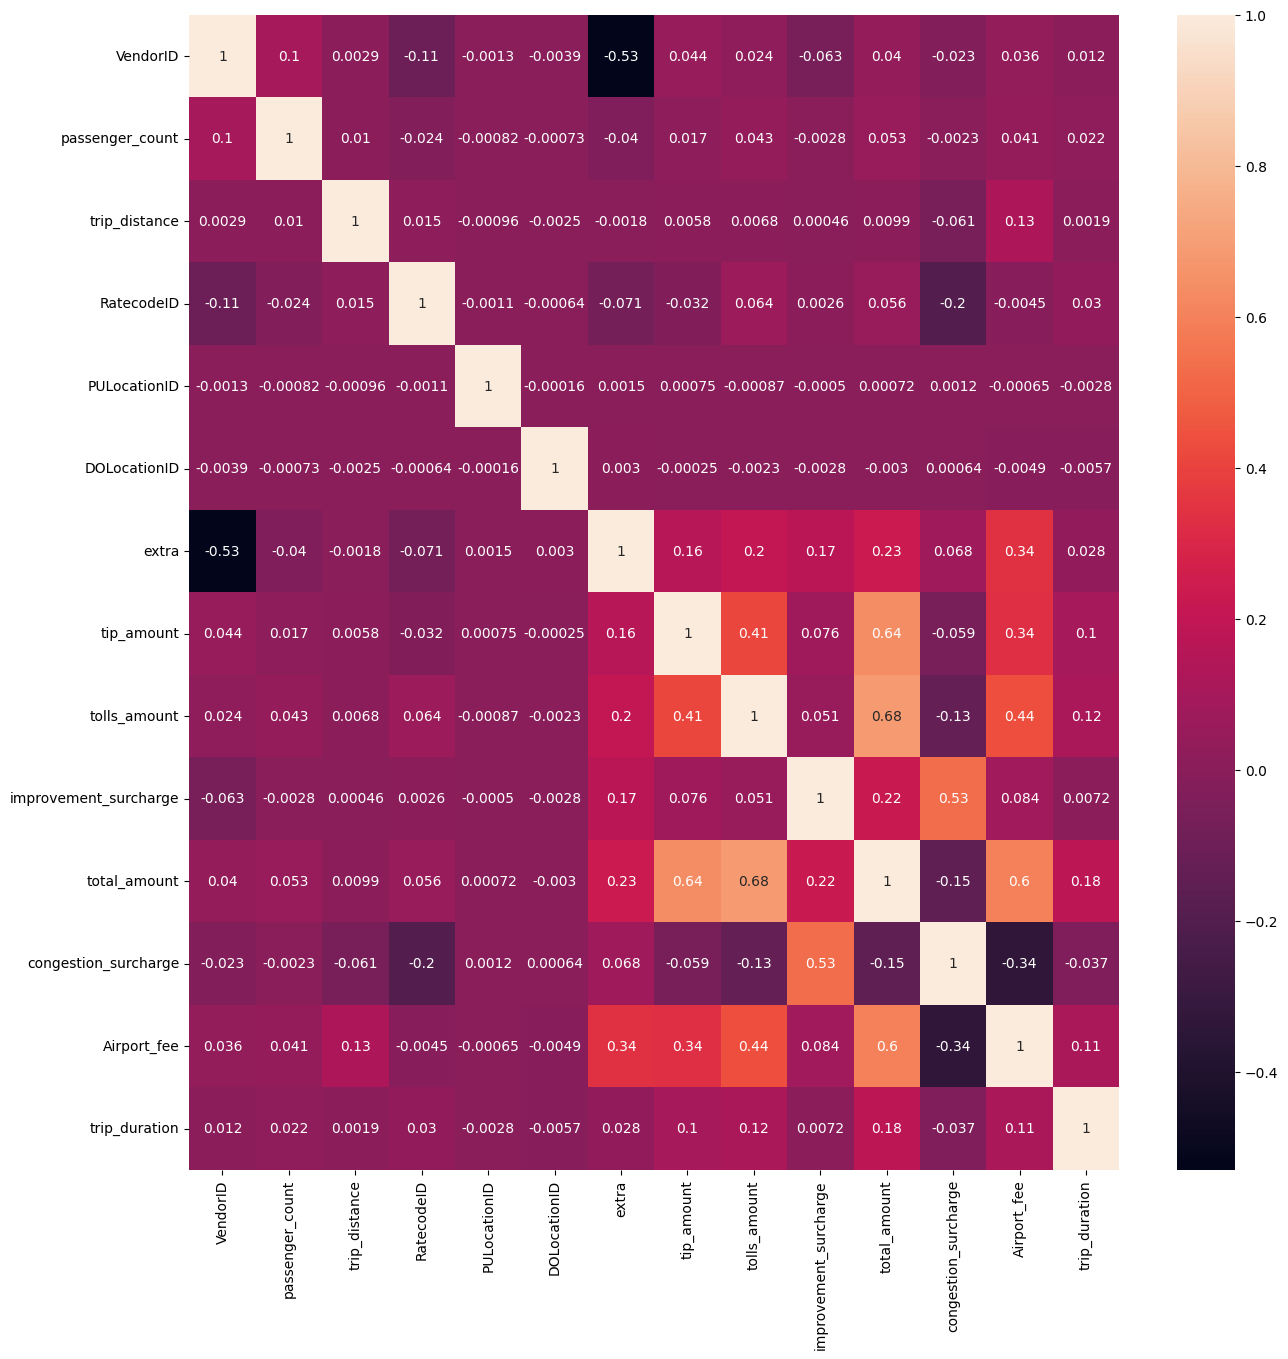

In [9]:
df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Extra, Tip Amount, Tolls Amount, Improvement Surcharge, Airport Fee, Trip Duration has strong positive
# Correlation with Total Amount so these columns are necessary for model training while other columns 
# have negligible to negative correlation

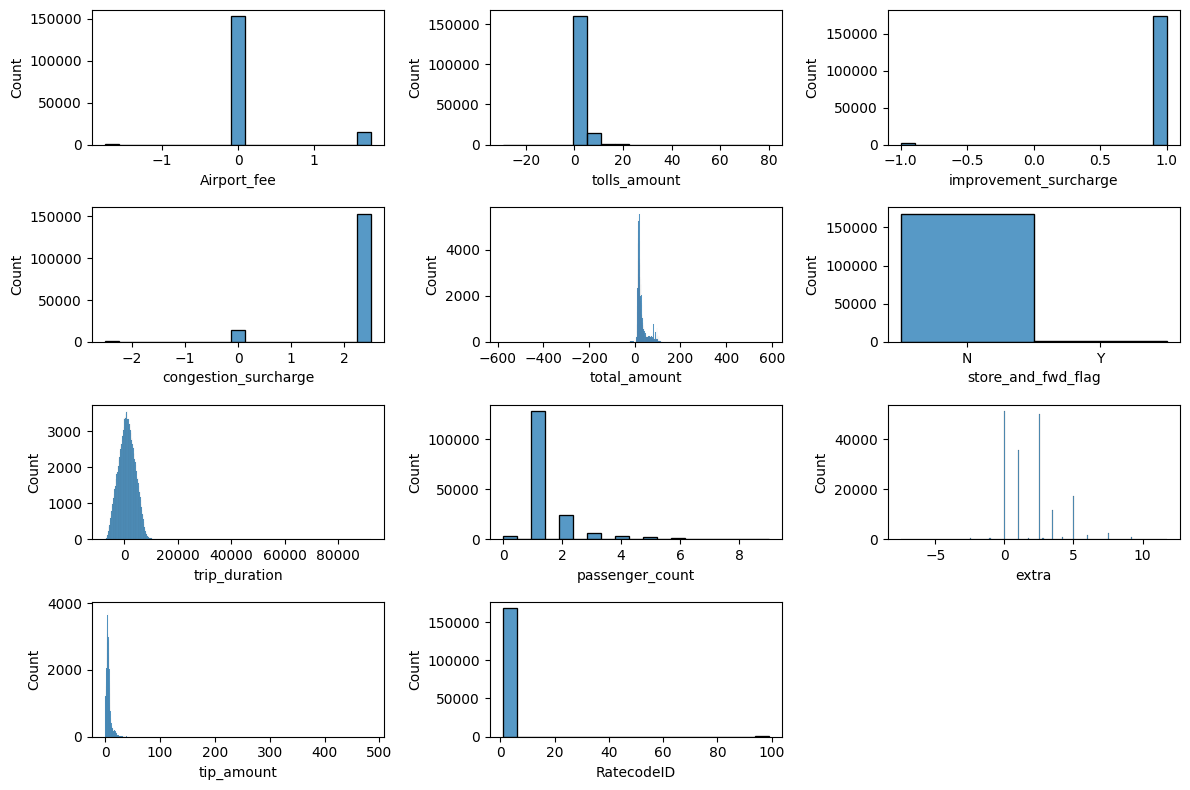

In [10]:
plt.figure(figsize = (12,8))
plt.subplot(4,3,1)
sns.histplot(data['Airport_fee'])
plt.subplot(4,3,2)
sns.histplot(data['tolls_amount'])
plt.subplot(4,3,3)
sns.histplot(data['improvement_surcharge'])
plt.subplot(4,3,4)
sns.histplot(data['congestion_surcharge'])
plt.subplot(4,3,5)
sns.histplot(data['total_amount'])
plt.subplot(4,3,6)
sns.histplot(data['store_and_fwd_flag'])
plt.subplot(4,3,7)
sns.histplot(data['trip_duration'])
plt.subplot(4,3,8)
sns.histplot(data['passenger_count'])
plt.subplot(4,3,9)
sns.histplot(data['extra'])
plt.subplot(4,3,10)
sns.histplot(data['tip_amount'])
plt.subplot(4,3,11)
sns.histplot(data['RatecodeID'])


plt.tight_layout()
plt.show()

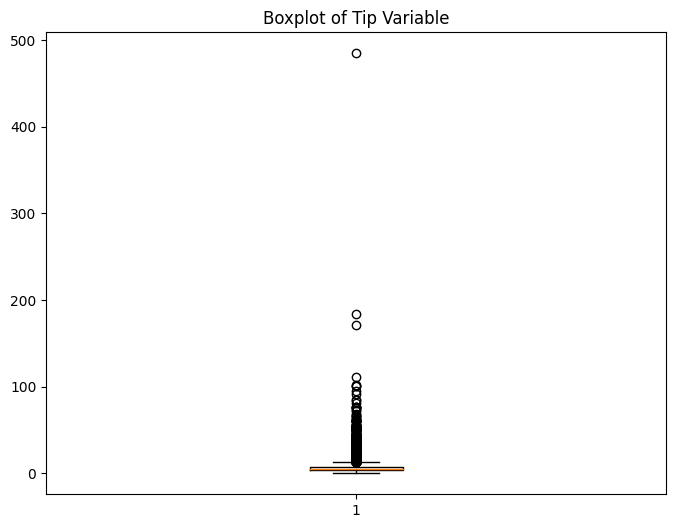

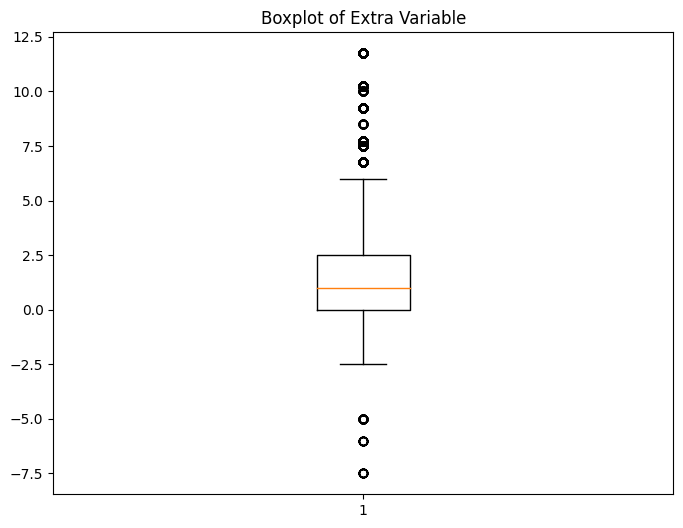

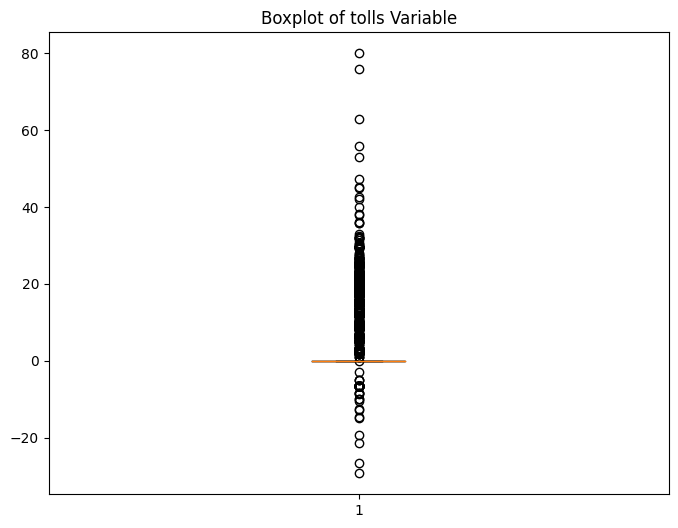

In [11]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['tip_amount'])
plt.title("Boxplot of Tip Variable")

plt.figure(figsize=(8, 6))
plt.boxplot(data['extra'])
plt.title("Boxplot of Extra Variable")

plt.figure(figsize=(8, 6))
plt.boxplot(data['tolls_amount'])
plt.title("Boxplot of tolls Variable")

plt.show()

In [12]:
df.isna().sum()

VendorID                    0
passenger_count          6077
trip_distance               0
RatecodeID               6077
PULocationID                0
DOLocationID                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
trip_duration               0
dtype: int64

In [13]:
zero_counts = (data == 0).sum()
zero_counts

# VendorID, extra, tolls_amount, improvement_surcharge, congestion_surcharge and airport_fee can be zero 
# whereas passenger count, trip_distance, total_amount and trip duration should not be zero.

VendorID                  47597
passenger_count            2818
trip_distance              2632
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
extra                     51247
tip_amount                    0
tolls_amount             159328
improvement_surcharge        45
total_amount                 22
congestion_surcharge      14325
Airport_fee              153074
trip_duration                19
dtype: int64

In [14]:
# Ignoring rows which have 0 as total amount
ind1 = np.where((data['total_amount'] != 0))
data = data.iloc[ind1]

* Extra, Tip Amount, Tolls Amount, Improvement Surcharge, Airport Fee, Trip Duration has strong positive Correlation with Total Amount so these columns are necessary for model training while other columns have negligible to negative correlation.

* On observing hist plots of airport fee, improvement surcharge and congestion surcharge an assumption can be made that values on the -ve x-axis can be a mistake as their absolute value is in majority on +ve x-axis and thus -ve values should also be changed to +ve.

* On trying that score decreased even further. So I have decided to keep those columns as it is.

* VendorID, extra, tolls_amount, improvement_surcharge, congestion_surcharge and airport_fee can be zero whereas passenger count, trip_distance, total_amount and trip duration should not be zero. So ignoring rows which have '0' as total amount.

* Any steps to change values of passenger count, trip distance etc from '0' to mean or most frequent value results in score reduction. 

# Imputing Values

In [15]:
# Reloading data
data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [16]:
# Ignoring rows which have 0 as total amount
ind1 = np.where((data['total_amount'] != 0))
data = data.iloc[ind1]

from datetime import datetime
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Function to calculate trip duration
def calculate_trip_duration(df):
    date_format = "%Y-%m-%d %H:%M:%S"
    df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
    df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
    df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
    df['trip_duration'] = df['trip_duration'].abs()
    return df

# List of categorical columns
categorical_columns = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'PULocationID', 'DOLocationID']

# Create the pipeline
main_pipeline = Pipeline([
    ('calculate_trip_duration', FunctionTransformer(calculate_trip_duration)),
    ('impute_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('onehot_encode', OneHotEncoder(sparse=True, drop='first', handle_unknown='ignore'))
])

1. Columns like congestion surcharge, airport fee, passenger count, store_and_fwd_flag etc have missing values but on observing their unique values these columns seem to be have categories in them.              EG : passenger count can only be an integer not a fraction. Similarly Airport fee has categories '0', '1.75', '-1.75' and 'Nan'.

2. So for imputing the values I have decided to use strategy = "most_frequent" instead of mean as 2.25 passenger is not correct. 

3. A function to calculate trip duration is created to use pickup datetime and dropoff date time in a meaningful way. It calculates total seconds spent on the trip.

4. A few values had -ve trip duration as dropoff time was in past compared to pickup time. So absolute value has been taken for such instances. 

5. A basic pipeline is created to ease the repeating tasks for training, validation and test sets and reuseability for future models too.


# Splitting Data into train and validation set

In [17]:
from sklearn.model_selection import train_test_split

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 7)

# Linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Xtrain_pipe = main_pipeline.fit_transform(X_train)
Xtest_pipe = main_pipeline.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2, 8, 9, 10, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [19]:
model = LinearRegression()
model.fit(Xtrain_pipe, y_train)
pred = model.predict(Xtest_pipe)

scores = cross_val_score(model, Xtrain_pipe, y_train, cv=5, scoring='r2')
print("Cross Validation score is: ",scores.mean())

print("R2 Score is: ",r2_score(y_test,pred))
print("Mean Squared Error is: ", mean_squared_error(y_test,pred))

# Test Score is 0.8152645741190376 
# Mean Squared Error is:  117.107 
# Cross Validation score is:  0.803
## In linear regression if you use abs on other data columns it gives lower score

Cross Validation score is:  0.8030469135412932
R2 Score is:  0.8152645741190376
Mean Squared Error is:  117.10772661064755


In [20]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.5)
model.fit(Xtrain_pipe, y_train)
pred = model.predict(Xtest_pipe)

scores = cross_val_score(model, Xtrain_pipe, y_train, cv=5, scoring='r2')
print("Cross Validation score is: ",scores.mean())

print("R2 Score is: ",r2_score(y_test,pred))
print("Mean Squared Error is: ", mean_squared_error(y_test,pred))


Cross Validation score is:  0.8024966669425879
R2 Score is:  0.8161014619512782
Mean Squared Error is:  116.5772055641594


# Linear Regression without onehot encoding and using simple imputer as 'most frequent'

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Reloading data
data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Ignoring rows which have 0 as total amount
ind1 = np.where((data['total_amount'] != 0))
data = data.iloc[ind1]

from datetime import datetime
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


def calculate_trip_duration(df):
    date_format = "%Y-%m-%d %H:%M:%S"
    #df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
    #df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))
    #df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
    df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
    df.drop(categorical_columns, axis = 1, inplace = True)
    #df['trip_duration'] = df['trip_duration'].abs()
    return df


categorical_columns = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'PULocationID', 'DOLocationID']


main_pipeline = Pipeline([
    ('calculate_trip_duration', FunctionTransformer(calculate_trip_duration)),
    ('impute_most_frequent', SimpleImputer(strategy='most_frequent'))
])



from sklearn.model_selection import train_test_split

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 7)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Xtrain_pipe = main_pipeline.fit_transform(X_train)
Xtest_pipe = main_pipeline.transform(X_test)

model = LinearRegression()
model.fit(Xtrain_pipe, y_train)
pred = model.predict(Xtest_pipe)

print("R2 score is: ",r2_score(y_test,pred))
print("MSE is: ", mean_squared_error(y_test, pred))
scores = cross_val_score(model, Xtrain_pipe, y_train, cv=5, scoring='r2')
print("Cross Validation score is: ",scores.mean())
# Test Score is 0.7270 
# MSE is:  173.048 
# Cross Validation score is: 0.714

R2 score is:  0.7270192213327868
MSE is:  173.04833789010758
Cross Validation score is:  0.7140354471917073


* In linear regression converting categorical variables by using one hot encoding is the key as is improves the score significantly. 

* Also tried introducing polynomial features but from degree = 2 r2 score falls down to -1.56.

* Using regularization like Ridge improves score slightly and also slightly reduces mean squared error.

* Running without onehot encoding gives poor score and high mean squared error.

* Linear regression has overall worst mean squared error values.

# Using KNN

In [22]:
### Using Onehot Encoding

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
# Reloading data
data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Ignoring rows which have 0 as total amount
ind1 = np.where((data['total_amount'] != 0))
data = data.iloc[ind1]

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from datetime import datetime
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint


def calculate_trip_duration(df):
    date_format = "%Y-%m-%d %H:%M:%S"
    df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
    df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
    df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
    df.drop(categorical_columns, axis = 1, inplace = True)
    df['trip_duration'] = df['trip_duration'].abs()
    return df


categorical_columns = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'PULocationID', 'DOLocationID']


main_pipeline = Pipeline([
    ('calculate_trip_duration', FunctionTransformer(calculate_trip_duration)),
    ('impute_most_frequent', SimpleImputer(strategy='most_frequent'))
])

from sklearn.model_selection import train_test_split

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 7)

knn = KNeighborsRegressor() 


Xtrain_pipe = main_pipeline.fit_transform(X_train)
Xtest_pipe = main_pipeline.transform(X_test)

In [23]:
#### Not using Onehot encoding 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Reloading data
data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Ignoring rows which have 0 as total amount
ind1 = np.where((data['total_amount'] != 0))
data = data.iloc[ind1]

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from datetime import datetime
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint

# Function to calculate trip duration
def calculate_trip_duration(df):
    #date_format = "%Y-%m-%d %H:%M:%S"
    #df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
    #df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))
    #df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
    df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
    df.drop(categorical_columns, axis = 1, inplace = True)
    #df['trip_duration'] = df['trip_duration'].abs()
    return df


categorical_columns = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'PULocationID', 'DOLocationID']


main_pipeline = Pipeline([
    ('calculate_trip_duration', FunctionTransformer(calculate_trip_duration)),
    ('impute_most_frequent', SimpleImputer(strategy='most_frequent'))
])

from sklearn.model_selection import train_test_split

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 7)

knn = KNeighborsRegressor() 


Xtrain_pipe = main_pipeline.fit_transform(X_train)
Xtest_pipe = main_pipeline.transform(X_test)

In [24]:
knn_param_dist = {
    'n_neighbors': randint(1, 20),
}

random_search = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_dist, n_iter=5, cv=10, scoring='r2', random_state=7)

random_search.fit(Xtrain_pipe, y_train)
best_n_neighbors = random_search.best_params_['n_neighbors']
print("Best number of neighbors:", best_n_neighbors)
#### randomised search cv gives result as 8

Best number of neighbors: 8


In [25]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(Xtrain_pipe, y_train)
pred = knn.predict(Xtest_pipe)
print("R2 score is: ",r2_score(y_test, pred))
print("MSE is: ",mean_squared_error(y_test, pred))
scores = cross_val_score(model, Xtrain_pipe, y_train, cv=5, scoring='r2')
print("Cross Validation score is: ",scores.mean())

#Dropping all categorical columns and ignoring pickuptime and dropoff time gives good results
#without onehot encoding 
#test score is 0.90593
#MSE is: 59.62
#Cross Validation score is: 0.714 


#with onehot encoding test score is 0.764
#MSE is: 149.569
#Cross Validation score is: 0.715

R2 score is:  0.9059383187719406
MSE is:  59.62770593276137
Cross Validation score is:  0.7140354471917073


* In KNN and SVM, SVM takes a lot of time and does not give pretty results so I have dropped SVM from notebook.

* For HPT in KNN gridsearchCV took a lot of time so opted randomisedsearchCV.

* Here the story is exact opposite from linear regression here ommiting onehot encoding gives significantly better results than using it. But cross validation score seems to stay same for both.

* Mean squared error for model with one hot encoding is more than x2.5 times of model without onehot encoding.

# Using Decision Tree Regressor

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
#test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')


ind1 = np.where((data['total_amount'] != 0))
X = data.iloc[ind1]

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3, test_size = 0.3)


#X_test = test


from datetime import datetime

date_format = "%Y-%m-%d %H:%M:%S"

X_train['tpep_pickup_datetime'] = X_train['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
X_train['tpep_dropoff_datetime'] = X_train['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))

X_train['trip_duration'] = (X_train['tpep_dropoff_datetime'] - X_train['tpep_pickup_datetime']).dt.total_seconds()

X_train.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis = 1, inplace = True)

#X_train.drop(['VendorID','RatecodeID'], axis = 1, inplace = True)

from sklearn.impute import SimpleImputer
#print(X_train)
heads = ['VendorID','passenger_count','trip_distance','RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','payment_type','extra','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','trip_duration']
imp = SimpleImputer(strategy = 'most_frequent')
X_train_imp = imp.fit_transform(X_train)
X_train = pd.DataFrame(X_train_imp, columns = heads)

X_train['trip_duration'] = X_train['trip_duration'].abs()

categorical_columns = ['VendorID','RatecodeID','store_and_fwd_flag', 'payment_type','PULocationID','DOLocationID']
onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(X_train[categorical_columns])
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
X_train = X_train.drop(categorical_columns, axis=1)
X_train = pd.concat([X_train, onehot_encoded_df], axis=1)


model = DecisionTreeRegressor(max_depth=30, random_state= 3, min_samples_split=12)
model.fit(X_train, y_train)


#X_test = test


from datetime import datetime

date_format = "%Y-%m-%d %H:%M:%S"

X_test['tpep_pickup_datetime'] = X_test['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
X_test['tpep_dropoff_datetime'] = X_test['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))

X_test['trip_duration'] = (X_test['tpep_dropoff_datetime'] - X_test['tpep_pickup_datetime']).dt.total_seconds()

X_test.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis = 1, inplace = True)

heads = ['VendorID','passenger_count','trip_distance','RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','payment_type','extra','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','trip_duration']

X_test_imp = imp.transform(X_test)
X_test = pd.DataFrame(X_test_imp, columns = heads)

X_test['trip_duration'] = X_test['trip_duration'].abs()

categorical_columns = ['VendorID','RatecodeID','store_and_fwd_flag', 'payment_type','PULocationID','DOLocationID']
#onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
onehot_encoded = onehot_encoder.transform(X_test[categorical_columns])
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
X_test = X_test.drop(categorical_columns, axis=1)
X_test = pd.concat([X_test, onehot_encoded_df], axis=1)

pred = model.predict(X_test)

from sklearn.metrics import r2_score    
print("R2 Score: ",r2_score(y_test, pred))
print("MSE is: ",mean_squared_error(y_test, pred))
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross Validation score is: ",scores.mean())

# Decision tree gives submission score of 0.90587
# Scaling does not affect decision tree but it still decreases score somehow so no scaling
# Increasing min_samples_split=10 increases score to 0.91019 
# min samples split to 15 decreases score to 0.90669 
# Increasing min_samples_split=11 increases score to 0.91032 
# Increasing min_samples_split=12 increases score to 0.91125 

# Test score is 0.9175 
# MSE is 54.231 
#Cross Validation score is: 0.9132

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.9184172108201197
MSE is:  53.64732689063916
Cross Validation score is:  0.9199518572796943


### Visualising decision tree

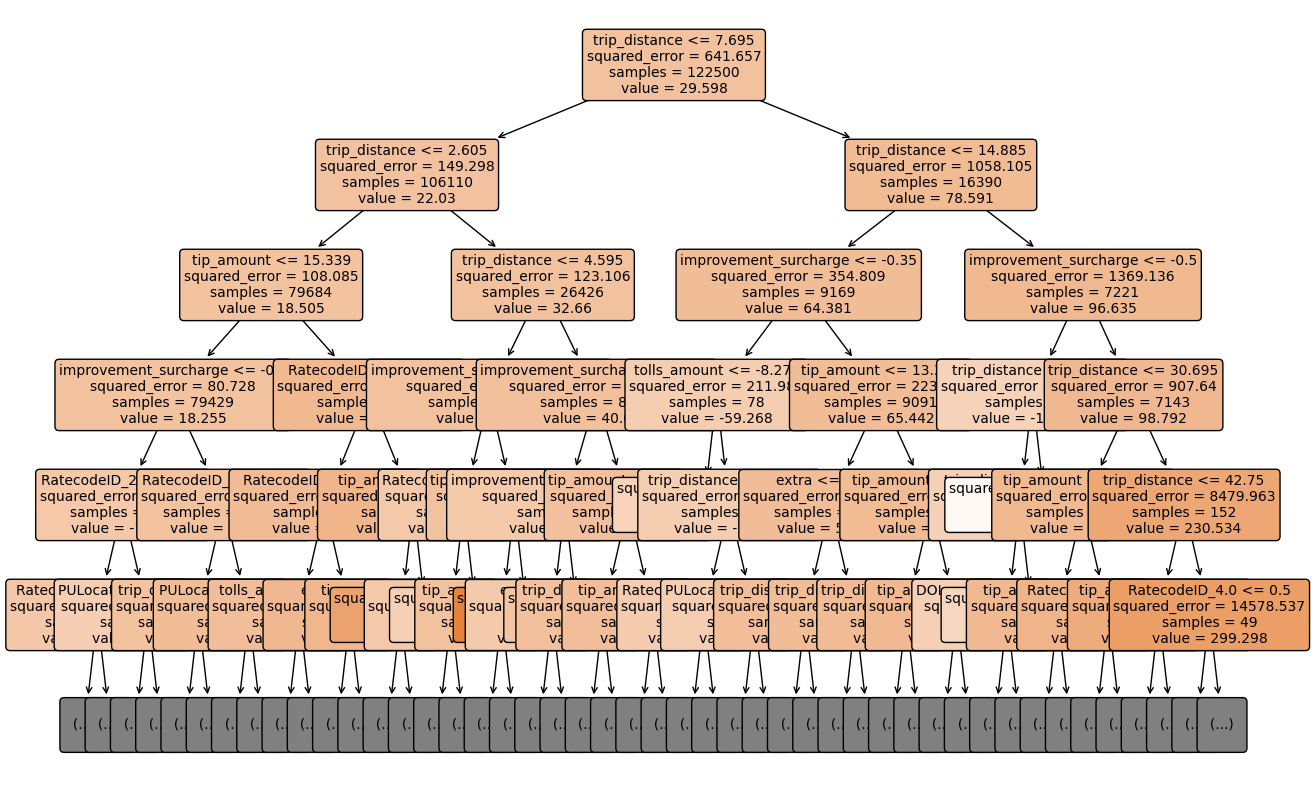

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, rounded=True, fontsize=10, max_depth = 5)
plt.show()

#### SIMPLIFIED PLOT OF TREE TO DEPTH OF 5 INSTEAD OF 30 TO SAVE PROCESSING TIME ####

# Using Lightgbm 

In [28]:
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
#test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')


ind1 = np.where((data['total_amount'] != 0))
X = data.iloc[ind1]

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3, test_size = 0.3)




from datetime import datetime

date_format = "%Y-%m-%d %H:%M:%S"

X_train['tpep_pickup_datetime'] = X_train['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
X_train['tpep_dropoff_datetime'] = X_train['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))

X_train['trip_duration'] = (X_train['tpep_dropoff_datetime'] - X_train['tpep_pickup_datetime']).dt.total_seconds()

X_train.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis = 1, inplace = True)



from sklearn.impute import SimpleImputer

heads = ['VendorID','passenger_count','trip_distance','RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','payment_type','extra','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','trip_duration']
imp = SimpleImputer(strategy = 'most_frequent')
X_train_imp = imp.fit_transform(X_train)
X_train = pd.DataFrame(X_train_imp, columns = heads)

X_train['trip_duration'] = X_train['trip_duration'].abs()

categorical_columns = ['VendorID','RatecodeID','store_and_fwd_flag', 'payment_type','PULocationID','DOLocationID']
onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(X_train[categorical_columns])
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
X_train = X_train.drop(categorical_columns, axis=1)
X_train = pd.concat([X_train, onehot_encoded_df], axis=1)
X_train = X_train.apply(pd.to_numeric)


model = lgb.LGBMRegressor(n_estimators=400,learning_rate=0.1,max_depth=30)
model.fit(X_train, y_train)




from datetime import datetime

date_format = "%Y-%m-%d %H:%M:%S"

X_test['tpep_pickup_datetime'] = X_test['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
X_test['tpep_dropoff_datetime'] = X_test['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))

X_test['trip_duration'] = (X_test['tpep_dropoff_datetime'] - X_test['tpep_pickup_datetime']).dt.total_seconds()

X_test.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis = 1, inplace = True)



heads = ['VendorID','passenger_count','trip_distance','RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','payment_type','extra','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','trip_duration']

X_test_imp = imp.transform(X_test)
X_test = pd.DataFrame(X_test_imp, columns = heads)

X_test['trip_duration'] = X_test['trip_duration'].abs()

categorical_columns = ['VendorID','RatecodeID','store_and_fwd_flag', 'payment_type','PULocationID','DOLocationID']


onehot_encoded = onehot_encoder.transform(X_test[categorical_columns])
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
X_test = X_test.drop(categorical_columns, axis=1)
X_test = pd.concat([X_test, onehot_encoded_df], axis=1)
X_test = X_test.apply(pd.to_numeric)


pred = model.predict(X_test)


from sklearn.metrics import r2_score    
print("R2 Score is: ",r2_score(y_test, pred))
print("MSE is: ", mean_squared_error(y_test, pred))
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross Validation score is: ",scores.mean())

#Lightgbm  GIVES submission score of  0.91125
# Test  score is: 0.928 
# MSE is: 47.154 
# Cross Validation score is:  0.930

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score is:  0.9282914596149897
MSE is:  47.15420428202249
Cross Validation score is:  0.9300144143522309


# Using Random Forest

In [29]:
'''
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')


ind1 = np.where((data['total_amount'] != 0))
X = data.iloc[ind1]

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

X_train = data.drop('total_amount', axis = 1)
y_train = data['total_amount']

#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3, test_size = 0.3)


X_test = test


from datetime import datetime

date_format = "%Y-%m-%d %H:%M:%S"

X_train['tpep_pickup_datetime'] = X_train['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
X_train['tpep_dropoff_datetime'] = X_train['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))

X_train['trip_duration'] = (X_train['tpep_dropoff_datetime'] - X_train['tpep_pickup_datetime']).dt.total_seconds()

X_train.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis = 1, inplace = True)

#X_train.drop(['VendorID','RatecodeID'], axis = 1, inplace = True)

from sklearn.impute import SimpleImputer
#print(X_train)



heads = ['VendorID','passenger_count','trip_distance','RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','payment_type','extra','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','trip_duration']
imp = SimpleImputer(strategy = 'most_frequent')
X_train_imp = imp.fit_transform(X_train)
X_train = pd.DataFrame(X_train_imp, columns = heads)

X_train['trip_duration'] = X_train['trip_duration'].abs()

categorical_columns = ['VendorID','RatecodeID','store_and_fwd_flag', 'payment_type','PULocationID','DOLocationID']
onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

onehot_encoded = onehot_encoder.fit_transform(X_train[categorical_columns])
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
X_train = X_train.drop(categorical_columns, axis=1)
X_train = pd.concat([X_train, onehot_encoded_df], axis=1)



#categorical_columns = ['VendorID','RatecodeID','store_and_fwd_flag', 'payment_type','PULocationID','DOLocationID']
#onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
#onehot_encoded = onehot_encoder.fit_transform(X_train[categorical_columns])
#feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
#onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
#X_train = X_train.drop(categorical_columns, axis=1)


model = RandomForestRegressor()
model.fit(X_train, y_train)





#X_test = test


from datetime import datetime

date_format = "%Y-%m-%d %H:%M:%S"

X_test['tpep_pickup_datetime'] = X_test['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
X_test['tpep_dropoff_datetime'] = X_test['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))

X_test['trip_duration'] = (X_test['tpep_dropoff_datetime'] - X_test['tpep_pickup_datetime']).dt.total_seconds()

X_test.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis = 1, inplace = True)

#X_test.drop(['VendorID','RatecodeID'], axis = 1, inplace = True)


heads = ['VendorID','passenger_count','trip_distance','RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','payment_type','extra','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','trip_duration']
#imp = SimpleImputer(strategy = 'most_frequent')
X_test_imp = imp.transform(X_test)
X_test = pd.DataFrame(X_test_imp, columns = heads)

X_test['trip_duration'] = X_test['trip_duration'].abs()

#categorical_columns = ['VendorID','RatecodeID','store_and_fwd_flag', 'payment_type','PULocationID','DOLocationID']
#onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
#onehot_encoded = onehot_encoder.transform(X_test[categorical_columns])
#feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
#onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
#X_test = X_test.drop(categorical_columns, axis=1)
#X_test = pd.concat([X_test, onehot_encoded_df], axis=1)
#X_test = X_test.apply(pd.to_numeric)
#scale = StandardScaler()
#X_test = scale.transform(X_test)

onehot_encoded = onehot_encoder.transform(X_test[categorical_columns])
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
X_test = X_test.drop(categorical_columns, axis=1)
X_test = pd.concat([X_test, onehot_encoded_df], axis=1)

X_test = X_test.apply(pd.to_numeric)


pred = model.predict(X_test)




#from sklearn.metrics import r2_score    
#r2_score(y_test, pred)

output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': pred})
output.to_csv("submission.csv", index=False)'''

#########################Random Forest GIVES 0.93309###########################
#########################and on Test set it gives 0.9391#######################

'\nimport numpy as np\nimport pandas as pd\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.linear_model import SGDRegressor\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import MaxAbsScaler\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.tree import DecisionTreeRegressor\nimport lightgbm as lgb\nfrom sklearn.ensemble import RandomForestRegressor\n\ndata = pd.read_csv(\'/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv\')\ntest = pd.read_csv(\'/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv\')\n\n\nind1 = np.where((data[\'total_amount\'] != 0))\nX = data.iloc[ind1]\n\nX = data.drop(\'total_amount\', axis = 1)\ny = data[\'total_amount\']\n\nX_train = data.drop(\'total_amount\', axis = 1)\ny_train = data[\'total_amount\']\n\n#X_train, X_test, y_train, y_test = train_test_split(X,y

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')


ind1 = np.where((data['total_amount'] != 0))
X = data.iloc[ind1]

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

X_train = data.drop('total_amount', axis = 1)
y_train = data['total_amount']

#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3, test_size = 0.3)


X_test = test


from datetime import datetime

date_format = "%Y-%m-%d %H:%M:%S"

X_train['tpep_pickup_datetime'] = X_train['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
X_train['tpep_dropoff_datetime'] = X_train['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))

X_train['trip_duration'] = (X_train['tpep_dropoff_datetime'] - X_train['tpep_pickup_datetime']).dt.total_seconds()

X_train.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis = 1, inplace = True)

#X_train.drop(['VendorID','RatecodeID'], axis = 1, inplace = True)

from sklearn.impute import SimpleImputer
#print(X_train)



heads = ['VendorID','passenger_count','trip_distance','RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','payment_type','extra','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','trip_duration']
imp = SimpleImputer(strategy = 'most_frequent')
X_train_imp = imp.fit_transform(X_train)
X_train = pd.DataFrame(X_train_imp, columns = heads)

X_train['trip_duration'] = X_train['trip_duration'].abs()

categorical_columns = ['RatecodeID','store_and_fwd_flag', 'payment_type']
onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

onehot_encoded = onehot_encoder.fit_transform(X_train[categorical_columns])
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
X_train = X_train.drop(categorical_columns, axis=1)
X_train = X_train.drop('VendorID', axis=1)
X_train = X_train.drop('PULocationID', axis=1)
X_train = X_train.drop('DOLocationID', axis=1)
X_train = pd.concat([X_train, onehot_encoded_df], axis=1)






model = ExtraTreesRegressor(n_estimators=300,max_depth=30, random_state= 42, min_samples_split=7)
model.fit(X_train, y_train)





#X_test = test


from datetime import datetime

date_format = "%Y-%m-%d %H:%M:%S"

X_test['tpep_pickup_datetime'] = X_test['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
X_test['tpep_dropoff_datetime'] = X_test['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, date_format))

X_test['trip_duration'] = (X_test['tpep_dropoff_datetime'] - X_test['tpep_pickup_datetime']).dt.total_seconds()

X_test.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis = 1, inplace = True)


X_test_imp = imp.transform(X_test)
X_test = pd.DataFrame(X_test_imp, columns = heads)

X_test['trip_duration'] = X_test['trip_duration'].abs()



onehot_encoded = onehot_encoder.transform(X_test[categorical_columns])
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
X_test = X_test.drop(categorical_columns, axis=1)
X_test = X_test.drop('VendorID', axis=1)
X_test = X_test.drop('PULocationID', axis=1)
X_test = X_test.drop('DOLocationID', axis=1)

X_test = pd.concat([X_test, onehot_encoded_df], axis=1)

X_test = X_test.apply(pd.to_numeric)


pred = model.predict(X_test)




#from sklearn.metrics import r2_score    
#r2_score(y_test, pred)

output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': pred})
output.to_csv("submission.csv", index=False)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


* Decision Tree is one of the most powerful ML model. Compared to KNN its cross val score is also almost similar to its r2 score.

* Decision tree gives a score of 0.90 on submission set.

* Increasing the min_samples_split section from 10 to 12 increases the score but then again increasing further score starts to drop.

* LightGBM also gives comparable score to decision tree but at a much faster rate.

* Its mean squared error is lesser compared to decision tree.

* Random forest is by far the slowest of them all. It took aroud 35 mins to complete one submission.

* Random forest has the best score of 0.93309 on submission set and the least difference of scores from submission set and validation set.

# Final Remarks

* Linear Regression is not a useful way to go as it proves to be a much simpler model for this dataset.

* KNN proved to have some potential but a huge difference in mean val score and mean squared error between onehot encoded and non one hot encoded models make it less favourable.

* Random forest can always score much better than any other models but it takes much more time than any other model.

* Between decision tree and LightGBM, LightGBM should be preffered as it is faster than decision tree and also gives a slight better r2 score and mean squared error also its the only model who's mean val score is greater than it's test set.

* Tuning LightGBM further may lead to scores comparable to random forest at much less computation cost.